In [2]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
os.getcwd()

'/Users/thanhhai/Documents/Learning/hands_on/potato-disease-tensorflow/training'

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=f"{os.getcwd()}/../dataset/PlantVillage/potato_disease",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
    )

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

2024-06-10 16:58:28.056249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


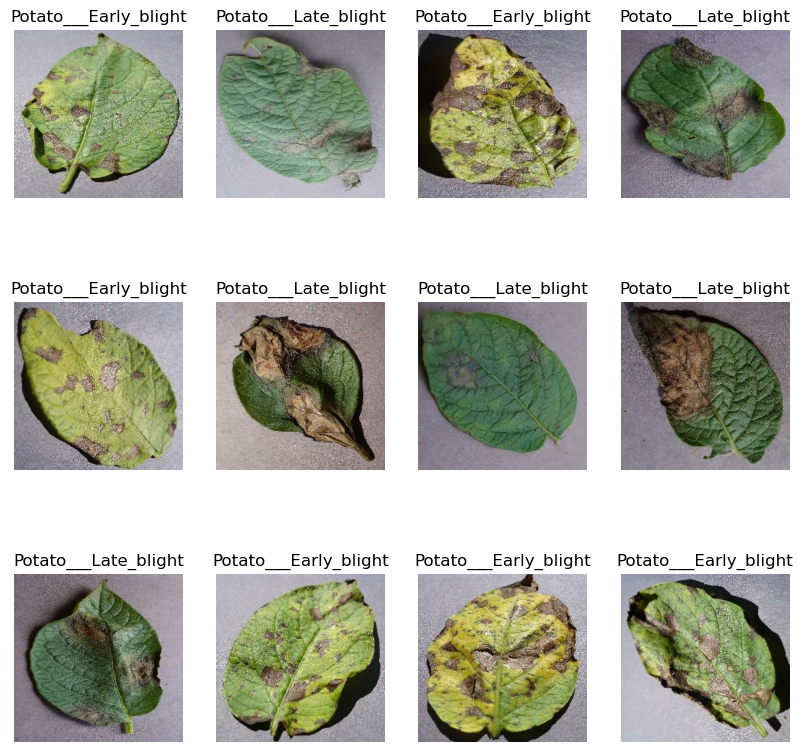

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
# Get 80% train, 10% val, 10% test
train_dataset = dataset.take(54)
test_dataset = dataset.skip(54)
# Split to val dataset
val_dataset = test_dataset.take(7)
test_dataset = test_dataset.skip(7)

In [9]:
len(train_dataset)

54